# Import Relevant Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Raw Data and Find Vinyl Peak

In [2]:
# Import raw data
df = pd.read_csv('t0_repeat_1.txt', delimiter = '\t') # Tab delimited.
df = df.drop(df.columns[0:3], axis=1) # Drop 1st 3 columns.
df

,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,139.747997,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
0,2041.0,2305.0,2534.0,2613.0,2541.0,2257.0,2252.0,2244.0,2162.0,2110.0,...,685.0,669.0,685.0,721.0,726.0,722.0,628.0,752.0,663.0,800.0
1,3396.0,3874.0,4427.0,4411.0,4408.0,4265.0,4099.0,3963.0,4147.0,4244.0,...,1543.0,1596.0,1526.0,1504.0,1600.0,1532.0,1610.0,1567.0,1617.0,1476.0
2,5149.0,5932.0,5975.0,6083.0,5784.0,5410.0,5033.0,4850.0,4508.0,4448.0,...,751.0,780.0,883.0,836.0,865.0,859.0,766.0,827.0,802.0,861.0
3,6800.0,7877.0,8272.0,7934.0,7536.0,6989.0,6554.0,6251.0,5835.0,5485.0,...,612.0,534.0,569.0,631.0,580.0,534.0,546.0,591.0,586.0,592.0
4,7807.0,9091.0,9294.0,9287.0,8638.0,8227.0,7160.0,6817.0,6218.0,6061.0,...,309.0,299.0,282.0,298.0,338.0,340.0,347.0,306.0,306.0,314.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,386.0,398.0,453.0,458.0,619.0,554.0,650.0,648.0,666.0,725.0,...,941.0,881.0,1007.0,912.0,1008.0,1068.0,1000.0,1063.0,1031.0,1101.0
331,338.0,346.0,411.0,479.0,507.0,573.0,580.0,628.0,794.0,792.0,...,832.0,916.0,907.0,934.0,994.0,999.0,944.0,1043.0,1005.0,944.0
332,313.0,433.0,493.0,506.0,631.0,618.0,634.0,615.0,687.0,716.0,...,925.0,929.0,995.0,904.0,996.0,863.0,911.0,952.0,996.0,940.0
333,351.0,422.0,531.0,465.0,604.0,555.0,655.0,603.0,754.0,660.0,...,860.0,989.0,902.0,938.0,918.0,936.0,932.0,913.0,886.0,1041.0


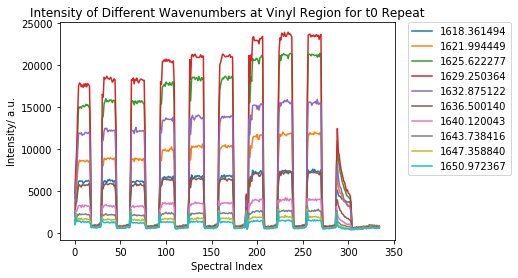

In [3]:
# Find out Vinyl Peak Wavenumber = ~1630 cm-1 Region

df.iloc[:, 375:385].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity/ a.u.')
plt.title('Intensity of Different Wavenumbers at Vinyl Region for t0 Repeat')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
plt.show() 
# Plot all columns in the region to see which intensity is the highest. Pick that index location.
# The vinyl peak is the wavenumber with the highest intensity.

In [4]:
# df.loc[:,'1629.250364'] --> When using loc.
df.columns.get_loc('1629.250364') #--> Use the get_loc command on the column index to find the index location. 
# df.iloc[:,378] --> When using iloc

# Column index 378 is equivalent to column label '1629.250364'. Use relevant parameter for iloc and loc respectively.

378

# Filter Relevant Spectra

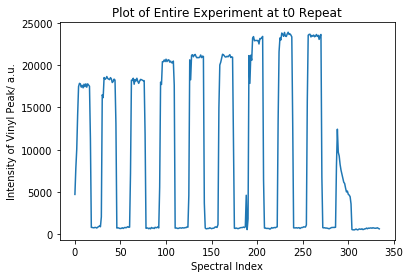

In [5]:
# Plot Vinyl Peak Wavenumber Column out.
df.loc[:,'1629.250364'].plot()
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Plot of Entire Experiment at t0 Repeat')
plt.show()

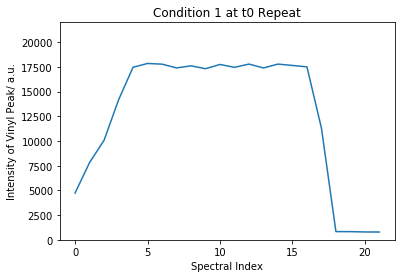

In [6]:
# Condition 
condition1 = df.iloc[:22,:] 
condition1.loc[:,'1629.250364'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 1 at t0 Repeat')
plt.ylim(0,22000) # Zoom in to relevant spectral range.
plt.show()

In [7]:
# Filter out relevant data to be stored and used for AUC analysis.

condition1_ss = condition1.loc[10:14, :]
condition1_ss.insert(loc = 0, column = 'Condition', value =10)
condition1_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
10,10,7835.0,9172.0,9486.0,9384.0,8670.0,7876.0,7043.0,6718.0,6343.0,...,243.0,276.0,268.0,313.0,339.0,287.0,253.0,301.0,243.0,302.0
11,10,8055.0,9101.0,9416.0,9337.0,8714.0,8066.0,7455.0,6723.0,6417.0,...,302.0,313.0,346.0,284.0,349.0,338.0,342.0,296.0,313.0,299.0
12,10,7806.0,9122.0,9359.0,9209.0,8717.0,7957.0,7170.0,6892.0,6431.0,...,297.0,289.0,297.0,275.0,339.0,372.0,279.0,304.0,304.0,314.0
13,10,7910.0,8721.0,9361.0,9147.0,8640.0,7847.0,7172.0,6621.0,6485.0,...,292.0,334.0,386.0,356.0,360.0,324.0,298.0,333.0,278.0,348.0
14,10,7828.0,8961.0,9369.0,9040.0,8419.0,7737.0,7113.0,6558.0,6269.0,...,307.0,325.0,383.0,330.0,343.0,353.0,320.0,361.0,310.0,312.0


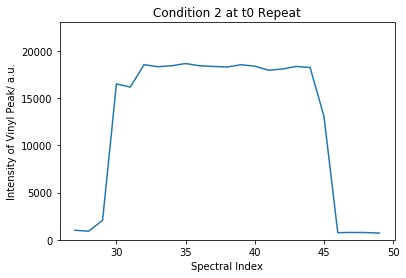

In [8]:
# condition 
condition2 = df.iloc[27:50,:] 
condition2.loc[:,'1629.250364'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 2 at t0 Repeat')
plt.ylim(0,23000) # Zoom in to relevant spectral range.
plt.show()

In [9]:
# Filter out relevant data to be stored and used for AUC analysis.

condition2_ss = condition2.loc[38:42, :]
condition2_ss.insert(loc = 0, column = 'Condition', value =11)
condition2_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
38,11,8041.0,9106.0,9364.0,9228.0,8656.0,7997.0,7328.0,6771.0,6321.0,...,235.0,200.0,301.0,231.0,314.0,271.0,209.0,174.0,308.0,246.0
39,11,7924.0,8838.0,9504.0,8961.0,8626.0,7798.0,7396.0,6761.0,6407.0,...,266.0,201.0,315.0,283.0,329.0,244.0,173.0,297.0,306.0,269.0
40,11,7939.0,9082.0,9350.0,9283.0,8476.0,7992.0,7316.0,6804.0,6215.0,...,198.0,236.0,205.0,240.0,294.0,255.0,263.0,236.0,200.0,270.0
41,11,7928.0,9193.0,9578.0,9289.0,8765.0,7925.0,7342.0,6925.0,6380.0,...,257.0,276.0,238.0,266.0,273.0,257.0,236.0,215.0,222.0,214.0
42,11,7693.0,9209.0,9388.0,9246.0,8596.0,8071.0,7257.0,6917.0,6397.0,...,241.0,259.0,302.0,289.0,294.0,297.0,254.0,258.0,273.0,251.0


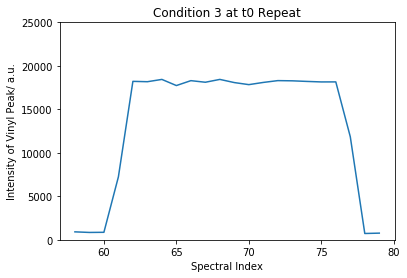

In [10]:
# Condition
condition3 = df.iloc[58:80,:] 
condition3.loc[:,'1629.250364'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 3 at t0 Repeat')
plt.ylim(0,25000) # Zoom in to relevant spectral range.
plt.show()

In [11]:
# Filter out relevant data to be stored and used for AUC analysis.

condition3_ss = condition3.loc[70:74, :]
condition3_ss.insert(loc = 0, column = 'Condition', value =12)
condition3_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
70,12,7898.0,9199.0,9349.0,9304.0,8445.0,7711.0,7107.0,6661.0,6340.0,...,205.0,230.0,241.0,215.0,303.0,239.0,190.0,195.0,176.0,221.0
71,12,7721.0,8863.0,9462.0,9163.0,8552.0,7789.0,7170.0,6798.0,6342.0,...,203.0,165.0,252.0,215.0,222.0,253.0,223.0,177.0,184.0,260.0
72,12,7848.0,9157.0,9462.0,9187.0,8628.0,7994.0,7352.0,6701.0,6319.0,...,184.0,194.0,273.0,183.0,269.0,210.0,183.0,223.0,183.0,202.0
73,12,7808.0,9041.0,9490.0,9196.0,8398.0,8081.0,7334.0,6623.0,6248.0,...,173.0,195.0,217.0,182.0,325.0,217.0,183.0,173.0,196.0,218.0
74,12,7638.0,8938.0,9693.0,9355.0,8674.0,7933.0,7261.0,6893.0,6230.0,...,202.0,175.0,223.0,206.0,217.0,168.0,224.0,170.0,189.0,173.0


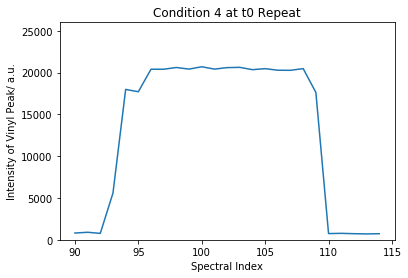

In [12]:
# Condition
condition4 = df.iloc[90:115,:] 
condition4.loc[:,'1629.250364'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 4 at t0 Repeat')
plt.ylim(0,26000) # Zoom in to relevant spectral range.
plt.show()

In [13]:
# Filter out relevant data to be stored and used for AUC analysis.

condition4_ss = condition4.loc[100:104, :]
condition4_ss.insert(loc = 0, column = 'Condition', value =13)
condition4_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
100,13,8289.0,9355.0,9908.0,9710.0,9031.0,8515.0,7384.0,7211.0,6571.0,...,197.0,186.0,197.0,158.0,236.0,273.0,156.0,187.0,153.0,190.0
101,13,8029.0,9340.0,9913.0,9639.0,9087.0,8195.0,7671.0,7090.0,6724.0,...,207.0,208.0,237.0,207.0,203.0,203.0,179.0,212.0,206.0,210.0
102,13,8204.0,9333.0,9984.0,9669.0,9021.0,8332.0,7713.0,7051.0,6687.0,...,177.0,158.0,252.0,154.0,217.0,188.0,192.0,207.0,147.0,131.0
103,13,8127.0,9292.0,10043.0,9638.0,9084.0,8476.0,7797.0,6997.0,6816.0,...,213.0,151.0,208.0,204.0,176.0,228.0,221.0,193.0,195.0,233.0
104,13,8240.0,9373.0,10096.0,9747.0,9216.0,8570.0,7609.0,6964.0,6850.0,...,145.0,170.0,218.0,196.0,238.0,244.0,223.0,236.0,146.0,184.0


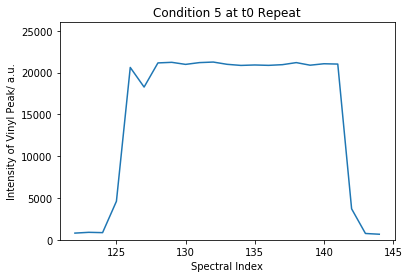

In [14]:
# Condition
condition5 = df.iloc[122:145,:] 
condition5.loc[:,'1629.250364'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 5 at t0 Repeat')
plt.ylim(0,26000) # Zoom in to relevant spectral range.
plt.show()

In [15]:
# Filter out relevant data to be stored and used for AUC analysis.

condition5_ss = condition5.loc[135:139, :]
condition5_ss.insert(loc = 0, column = 'Condition', value =14)
condition5_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
135,14,8353.0,9560.0,10007.0,9776.0,9122.0,8403.0,7633.0,6927.0,6571.0,...,150.0,147.0,158.0,212.0,167.0,200.0,159.0,170.0,181.0,194.0
136,14,8148.0,9525.0,9889.0,9653.0,9217.0,8399.0,7727.0,7130.0,6681.0,...,218.0,165.0,240.0,215.0,236.0,204.0,120.0,243.0,192.0,234.0
137,14,8313.0,9559.0,9949.0,9671.0,9026.0,8399.0,7814.0,7077.0,6648.0,...,181.0,162.0,218.0,206.0,212.0,228.0,192.0,180.0,191.0,221.0
138,14,8382.0,9580.0,9933.0,9682.0,9273.0,8387.0,7965.0,7175.0,6796.0,...,156.0,188.0,197.0,244.0,232.0,223.0,123.0,176.0,132.0,195.0
139,14,8365.0,9538.0,9979.0,9695.0,9115.0,8419.0,7575.0,7180.0,6715.0,...,183.0,204.0,188.0,192.0,208.0,228.0,131.0,186.0,180.0,178.0


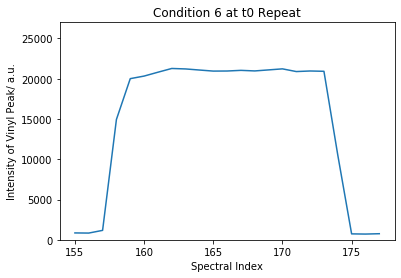

In [16]:
# Condition
condition6 = df.iloc[155:178,:] 
condition6.loc[:,'1629.250364'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 6 at t0 Repeat')
plt.ylim(0,27000) # Zoom in to relevant spectral range.
plt.show()

In [17]:
# Filter out relevant data to be stored and used for AUC analysis.

condition6_ss = condition6.loc[167:171, :]
condition6_ss.insert(loc = 0, column = 'Condition', value =15)
condition6_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
167,15,8284.0,9365.0,9974.0,10006.0,9210.0,8345.0,7857.0,7314.0,6721.0,...,198.0,129.0,198.0,159.0,279.0,202.0,176.0,218.0,188.0,194.0
168,15,8038.0,9474.0,9794.0,9766.0,9248.0,8378.0,7768.0,7317.0,6612.0,...,168.0,205.0,227.0,216.0,229.0,211.0,130.0,159.0,165.0,187.0
169,15,8403.0,9603.0,9952.0,9656.0,9177.0,8506.0,7711.0,7227.0,6868.0,...,202.0,208.0,207.0,179.0,289.0,191.0,187.0,200.0,158.0,226.0
170,15,8135.0,9594.0,9930.0,9855.0,9089.0,8414.0,7901.0,7256.0,6887.0,...,177.0,132.0,190.0,189.0,182.0,203.0,107.0,205.0,199.0,179.0
171,15,8185.0,9640.0,9918.0,9749.0,9377.0,8282.0,7688.0,7237.0,6676.0,...,169.0,136.0,200.0,142.0,237.0,205.0,128.0,168.0,161.0,134.0


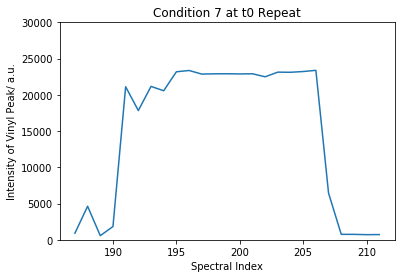

In [18]:
# Condition
condition7 = df.iloc[187:212,:] 
condition7.loc[:,'1629.250364'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 7 at t0 Repeat')
plt.ylim(0,30000) # Zoom in to relevant spectral range.
plt.show()

In [19]:
# Filter out relevant data to be stored and used for AUC analysis.

condition7_ss = condition7.loc[200:204, :]
condition7_ss.insert(loc = 0, column = 'Condition', value =16)
condition7_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
200,16,8674.0,9957.0,10500.0,10395.0,9733.0,8838.0,8101.0,7600.0,7222.0,...,165.0,172.0,168.0,232.0,194.0,199.0,204.0,203.0,123.0,193.0
201,16,8681.0,10050.0,10307.0,10295.0,9560.0,8962.0,8254.0,7555.0,6993.0,...,152.0,142.0,178.0,158.0,197.0,250.0,181.0,193.0,146.0,202.0
202,16,8258.0,9605.0,10059.0,10113.0,8985.0,8535.0,8026.0,7460.0,6878.0,...,253.0,182.0,278.0,205.0,291.0,273.0,227.0,209.0,212.0,255.0
203,16,8631.0,9965.0,10577.0,10357.0,9752.0,9131.0,8370.0,7638.0,7196.0,...,153.0,131.0,153.0,134.0,193.0,191.0,185.0,169.0,164.0,160.0
204,16,8582.0,9923.0,10440.0,10293.0,9640.0,8993.0,8272.0,7785.0,7105.0,...,198.0,150.0,225.0,186.0,231.0,184.0,136.0,152.0,153.0,158.0


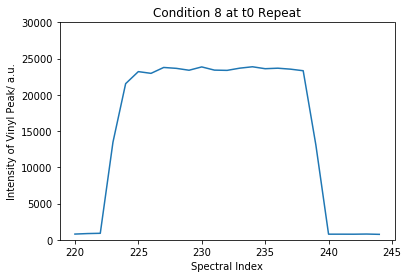

In [20]:
# Condition
condition8 = df.iloc[220:245,:] 
condition8.loc[:,'1629.250364'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 8 at t0 Repeat')
plt.ylim(0,30000) # Zoom in to relevant spectral range.
plt.show()

In [21]:
# Filter out relevant data to be stored and used for AUC analysis.

condition8_ss = condition8.loc[232:236, :]
condition8_ss.insert(loc = 0, column = 'Condition', value =17)
condition8_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
232,17,8817.0,9877.0,10494.0,10501.0,9789.0,9029.0,8353.0,7762.0,7133.0,...,105.0,102.0,191.0,159.0,166.0,245.0,148.0,242.0,186.0,223.0
233,17,8975.0,10075.0,10412.0,10314.0,9894.0,9251.0,8287.0,7762.0,7413.0,...,149.0,145.0,190.0,191.0,236.0,195.0,143.0,139.0,133.0,208.0
234,17,8668.0,9882.0,10566.0,10489.0,9973.0,9050.0,8515.0,7667.0,7363.0,...,143.0,232.0,168.0,209.0,253.0,240.0,162.0,179.0,192.0,195.0
235,17,8734.0,10018.0,10718.0,10389.0,9831.0,9215.0,8263.0,7591.0,7378.0,...,186.0,210.0,147.0,193.0,222.0,199.0,201.0,200.0,208.0,183.0
236,17,8519.0,10261.0,10591.0,10516.0,9883.0,9150.0,8394.0,7726.0,7273.0,...,160.0,144.0,188.0,116.0,166.0,220.0,163.0,120.0,148.0,180.0


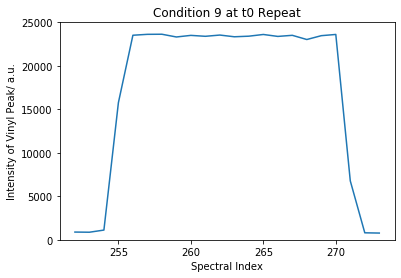

In [22]:
# Condition
condition9 = df.iloc[252:274,:] 
condition9.loc[:,'1629.250364'].plot() # Plot the spectra out
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Condition 9 at t0 Repeat')
plt.ylim(0,25000) # Zoom in to relevant spectral range.
plt.show()

In [23]:
# Filter out relevant data to be stored and used for AUC analysis.

condition9_ss = condition9.loc[265:269, :]
condition9_ss.insert(loc = 0, column = 'Condition', value =18)
condition9_ss

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
265,18,8627.0,9928.0,10571.0,10368.0,9868.0,8885.0,8247.0,7891.0,7257.0,...,183.0,156.0,222.0,214.0,226.0,205.0,138.0,194.0,168.0,182.0
266,18,8686.0,9867.0,10404.0,10415.0,9742.0,9192.0,8282.0,7651.0,7236.0,...,177.0,157.0,218.0,226.0,242.0,203.0,168.0,230.0,176.0,173.0
267,18,8746.0,10133.0,10673.0,10541.0,9784.0,9066.0,8289.0,7850.0,7303.0,...,167.0,213.0,185.0,196.0,211.0,259.0,140.0,214.0,161.0,214.0
268,18,8501.0,9725.0,10297.0,9995.0,9809.0,8957.0,8297.0,7581.0,7118.0,...,215.0,255.0,174.0,200.0,252.0,249.0,186.0,210.0,166.0,191.0
269,18,8616.0,10128.0,10531.0,10324.0,9511.0,8901.0,8297.0,7611.0,7275.0,...,187.0,120.0,146.0,187.0,216.0,177.0,157.0,122.0,82.0,183.0


In [24]:
df_ = pd.concat([condition1_ss, condition2_ss, condition3_ss, condition4_ss, condition5_ss, condition6_ss, condition7_ss,
                 condition8_ss, condition9_ss])
# Concatenate all relevant slug dataframes.

df_

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
10,10,7835.0,9172.0,9486.0,9384.0,8670.0,7876.0,7043.0,6718.0,6343.0,...,243.0,276.0,268.0,313.0,339.0,287.0,253.0,301.0,243.0,302.0
11,10,8055.0,9101.0,9416.0,9337.0,8714.0,8066.0,7455.0,6723.0,6417.0,...,302.0,313.0,346.0,284.0,349.0,338.0,342.0,296.0,313.0,299.0
12,10,7806.0,9122.0,9359.0,9209.0,8717.0,7957.0,7170.0,6892.0,6431.0,...,297.0,289.0,297.0,275.0,339.0,372.0,279.0,304.0,304.0,314.0
13,10,7910.0,8721.0,9361.0,9147.0,8640.0,7847.0,7172.0,6621.0,6485.0,...,292.0,334.0,386.0,356.0,360.0,324.0,298.0,333.0,278.0,348.0
14,10,7828.0,8961.0,9369.0,9040.0,8419.0,7737.0,7113.0,6558.0,6269.0,...,307.0,325.0,383.0,330.0,343.0,353.0,320.0,361.0,310.0,312.0
38,11,8041.0,9106.0,9364.0,9228.0,8656.0,7997.0,7328.0,6771.0,6321.0,...,235.0,200.0,301.0,231.0,314.0,271.0,209.0,174.0,308.0,246.0
39,11,7924.0,8838.0,9504.0,8961.0,8626.0,7798.0,7396.0,6761.0,6407.0,...,266.0,201.0,315.0,283.0,329.0,244.0,173.0,297.0,306.0,269.0
40,11,7939.0,9082.0,9350.0,9283.0,8476.0,7992.0,7316.0,6804.0,6215.0,...,198.0,236.0,205.0,240.0,294.0,255.0,263.0,236.0,200.0,270.0
41,11,7928.0,9193.0,9578.0,9289.0,8765.0,7925.0,7342.0,6925.0,6380.0,...,257.0,276.0,238.0,266.0,273.0,257.0,236.0,215.0,222.0,214.0
42,11,7693.0,9209.0,9388.0,9246.0,8596.0,8071.0,7257.0,6917.0,6397.0,...,241.0,259.0,302.0,289.0,294.0,297.0,254.0,258.0,273.0,251.0


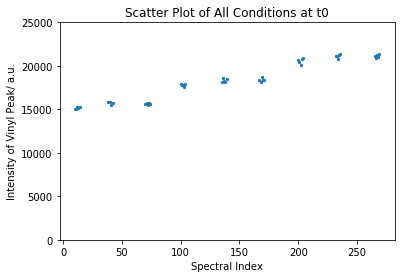

In [25]:
x = df_.index # Extract row indices (spectral index).
y = df_.iloc[:,378] # Extract intensity of vinyl peak.
plt.xlabel('Spectral Index')
plt.ylabel('Intensity of Vinyl Peak/ a.u.')
plt.title('Scatter Plot of All Conditions at t0')
plt.ylim(0, 25000)

plt.scatter(x,y, s = 5) # Render a scatter plot between x and y, with size of dots = 5.
plt.show()

# Verify Manual Labeling Accuracy

In [26]:
df_['Condition'] = df_['Condition'].astype('category')
df_['Condition'].nunique()
# Verify number of unique categories. This must correspond with the number of conditions.

9

In [27]:
# Inspect df_.
df_

,Condition,99.250815,103.762030,108.271065,112.775798,117.278356,121.778742,126.274835,130.766640,135.260520,...,2473.076347,2476.239604,2479.400013,2482.560815,2485.720391,2488.877123,2492.034249,2495.188534,2498.338365,2501.490207
10,10,7835.0,9172.0,9486.0,9384.0,8670.0,7876.0,7043.0,6718.0,6343.0,...,243.0,276.0,268.0,313.0,339.0,287.0,253.0,301.0,243.0,302.0
11,10,8055.0,9101.0,9416.0,9337.0,8714.0,8066.0,7455.0,6723.0,6417.0,...,302.0,313.0,346.0,284.0,349.0,338.0,342.0,296.0,313.0,299.0
12,10,7806.0,9122.0,9359.0,9209.0,8717.0,7957.0,7170.0,6892.0,6431.0,...,297.0,289.0,297.0,275.0,339.0,372.0,279.0,304.0,304.0,314.0
13,10,7910.0,8721.0,9361.0,9147.0,8640.0,7847.0,7172.0,6621.0,6485.0,...,292.0,334.0,386.0,356.0,360.0,324.0,298.0,333.0,278.0,348.0
14,10,7828.0,8961.0,9369.0,9040.0,8419.0,7737.0,7113.0,6558.0,6269.0,...,307.0,325.0,383.0,330.0,343.0,353.0,320.0,361.0,310.0,312.0
38,11,8041.0,9106.0,9364.0,9228.0,8656.0,7997.0,7328.0,6771.0,6321.0,...,235.0,200.0,301.0,231.0,314.0,271.0,209.0,174.0,308.0,246.0
39,11,7924.0,8838.0,9504.0,8961.0,8626.0,7798.0,7396.0,6761.0,6407.0,...,266.0,201.0,315.0,283.0,329.0,244.0,173.0,297.0,306.0,269.0
40,11,7939.0,9082.0,9350.0,9283.0,8476.0,7992.0,7316.0,6804.0,6215.0,...,198.0,236.0,205.0,240.0,294.0,255.0,263.0,236.0,200.0,270.0
41,11,7928.0,9193.0,9578.0,9289.0,8765.0,7925.0,7342.0,6925.0,6380.0,...,257.0,276.0,238.0,266.0,273.0,257.0,236.0,215.0,222.0,214.0
42,11,7693.0,9209.0,9388.0,9246.0,8596.0,8071.0,7257.0,6917.0,6397.0,...,241.0,259.0,302.0,289.0,294.0,297.0,254.0,258.0,273.0,251.0


In [28]:
# Generate summary statistics for the vinyl wavenumber.
df_[['Condition', '1629.250364']].groupby('Condition').describe()

1629.250364                                                  \
                count     mean         std      min      25%      50%   
Condition                                                               
10                5.0  17625.8  192.903344  17386.0  17447.0  17740.0   
11                5.0  18232.0  231.791933  17938.0  18065.0  18276.0   
12                5.0  18144.8  188.539651  17840.0  18094.0  18210.0   
13                5.0  20530.4  147.269481  20343.0  20410.0  20588.0   
14                5.0  20953.8  133.939165  20859.0  20878.0  20904.0   
15                5.0  21044.6  127.457052  20891.0  20969.0  21040.0   
16                5.0  22904.6  259.168478  22488.0  22884.0  22907.0   
17                5.0  23642.2  178.999162  23376.0  23605.0  23676.0   
18                5.0  23399.6  222.682060  23028.0  23384.0  23469.0   

                             
               75%      max  
Condition                    
10         17777.0  17779.0  
11         18364.0  18517.0  
12         18278.0  18302.0  
13         20620.0  20691.0  
14         20941.0  21187.0  
15         21097.0  21226.0  
16         23113.0  23131.0  
17         23681.0  23873.0  
18         23510.0  23607.0

In [29]:
# Write extracted dataframe to csv file.
df_.to_csv(r'C:\Users\Tan Jin Da\Desktop\High Throughput Experiments Data\201020 High Throughput Experiment Conditions 10 to 18\Online Raman\df_t0_repeat.csv')